In [244]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Análisis datos generados

In [245]:
Sinusoidal = pd.read_excel("sinusoidal.xlsx")
Rectangular = pd.read_excel("rectangular.xlsx")
Triangular = pd.read_excel("triangular.xlsx")
Sinusoidal,Rectangular,Triangular

(            X     Y
 0    -0.02500  3.68
 1    -0.02498  3.68
 2    -0.02496  3.60
 3    -0.02494  3.60
 4    -0.02492  3.60
 ...       ...   ...
 2495  0.02490 -3.76
 2496  0.02492 -3.76
 2497  0.02494 -3.76
 2498  0.02496 -3.76
 2499  0.02498 -3.68
 
 [2500 rows x 2 columns],
             X     Y
 0    -0.02500  3.76
 1    -0.02498  3.84
 2    -0.02496  3.76
 3    -0.02494  3.76
 4    -0.02492  3.84
 ...       ...   ...
 2495  0.02490 -3.76
 2496  0.02492 -3.76
 2497  0.02494 -3.76
 2498  0.02496 -3.76
 2499  0.02498 -3.76
 
 [2500 rows x 2 columns],
             X     Y
 0    -0.02500  2.80
 1    -0.02498  2.72
 2    -0.02496  2.72
 3    -0.02494  2.64
 4    -0.02492  2.64
 ...       ...   ...
 2495  0.02490 -3.04
 2496  0.02492 -3.04
 2497  0.02494 -2.96
 2498  0.02496 -2.88
 2499  0.02498 -2.80
 
 [2500 rows x 2 columns])

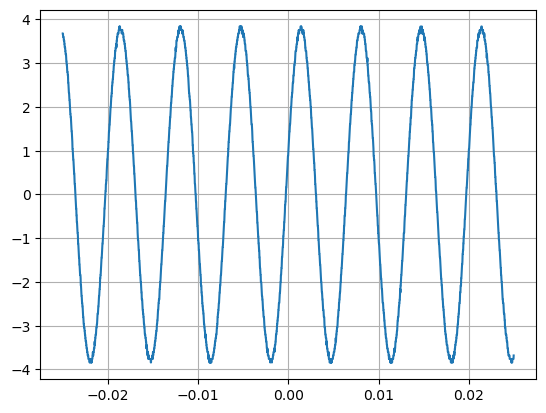

In [246]:
plt.plot(Sinusoidal["X"],Sinusoidal["Y"])
plt.savefig("sinusoidal.pdf")
plt.grid()

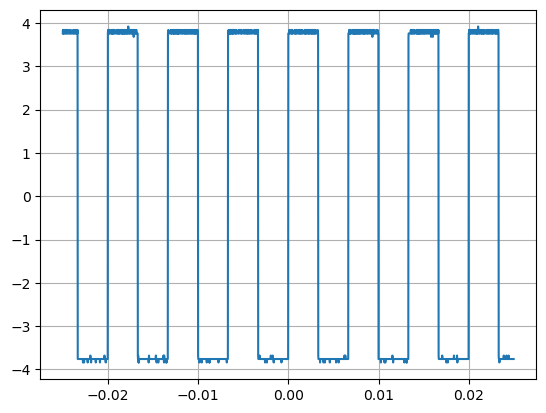

In [247]:
plt.plot(Rectangular["X"],Rectangular["Y"])
plt.savefig("square.pdf")
plt.grid()

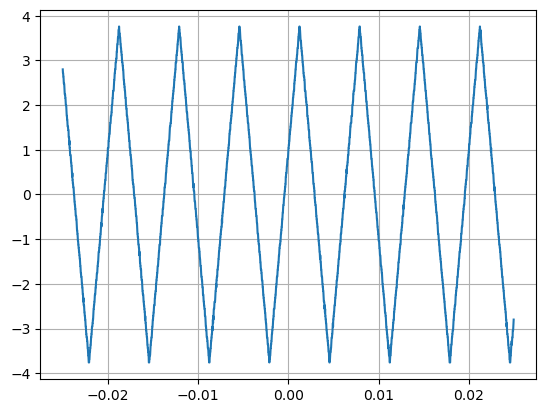

In [248]:
plt.plot(Triangular["X"],Triangular["Y"])
plt.savefig("triangular.pdf")
plt.grid()

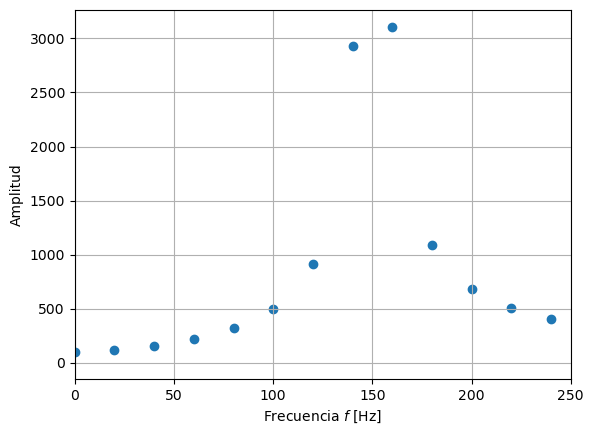

In [249]:
sinusoidal_x,sinusoidal_y = Sinusoidal["X"].to_numpy(),Sinusoidal["Y"].to_numpy()

N = len(sinusoidal_y)
step = (sinusoidal_x[-1] - sinusoidal_x[0])/N
sinusoidal_fft = fft(sinusoidal_y)
x_sinusoidal_fft = fftfreq(N,step)



plt.scatter(x_sinusoidal_fft, np.abs(sinusoidal_fft))
plt.xlim(0,250)
plt.ylabel(r"$c_n$")
plt.xlabel("Frecuencia $f$ [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.savefig("fft-sinusoidal.pdf")



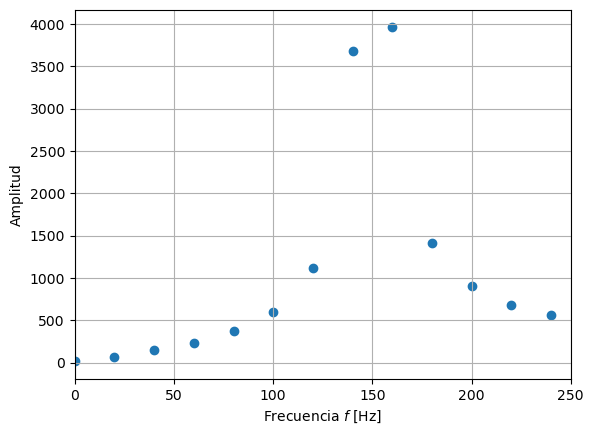

In [250]:
rectangular_x,rectangular_y = Rectangular["X"].to_numpy(),Rectangular["Y"].to_numpy()

N = len(rectangular_y)
step = (rectangular_x[-1] - rectangular_x[0])/N
rectangular_fft = fft(rectangular_y)
x_rectangular_fft = fftfreq(N,step)

plt.scatter(x_rectangular_fft,np.abs(rectangular_fft))
plt.xlim(0,250)
plt.ylabel(r"$c_n$")
plt.xlabel("Frecuencia $f$ [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.savefig("fft-square.pdf")



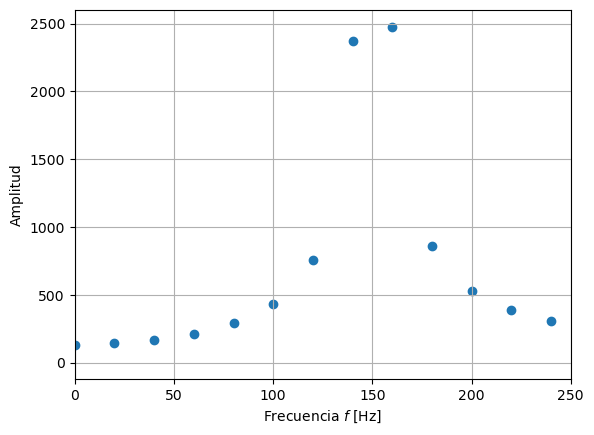

In [251]:
triangular_x,triangular_y =Triangular["X"].to_numpy(),Triangular["Y"].to_numpy()

N = len(triangular_y)
step = (triangular_x[-1] - triangular_x[0])/N
triangular_fft = fft(triangular_y)
x_triangular_fft = fftfreq(N,step)

plt.scatter(x_triangular_fft, np.abs(triangular_fft))
plt.xlim(0,250)
plt.ylabel(r"$c_n$")
plt.xlabel("Frecuencia $f$ [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.savefig("fft-triangular.pdf")



# Análisis con datos de funciones dadas

In [252]:
DataFrame = pd.read_excel("Data.xlsx")
x_noise = DataFrame["X_noise"].to_numpy()
y_noise = DataFrame["Y_noise"].to_numpy()

x_phase = DataFrame["X_phase"].to_numpy()
y_phase = DataFrame["Y_phase"].to_numpy()

x_phasent = DataFrame["X_phasent"].to_numpy()
y_phasent = DataFrame["Y_phasent"].to_numpy()

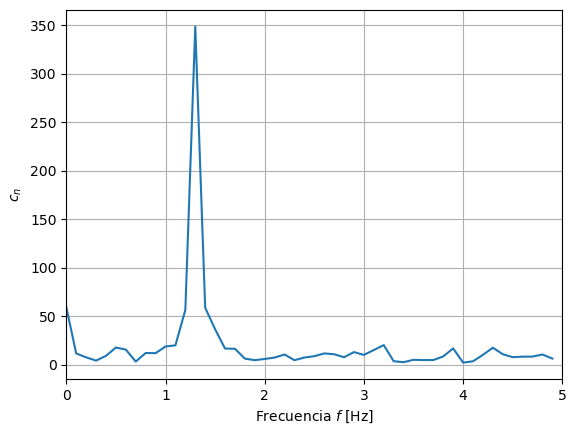

In [253]:
N = len(y_noise)
step = (x_noise[-1] - x_noise[0])/N

y_noise_fft = fft(y_noise)
x_noise_fft = fftfreq(N,step)[0:N//2]

plt.plot(x_noise_fft, np.abs(y_noise_fft[0:N//2]))
plt.xlim(0,5)
plt.ylabel(r"$c_n$")
plt.xlabel("Frecuencia $f$ [Hz]")
plt.grid()
plt.savefig("fft-noise.pdf")

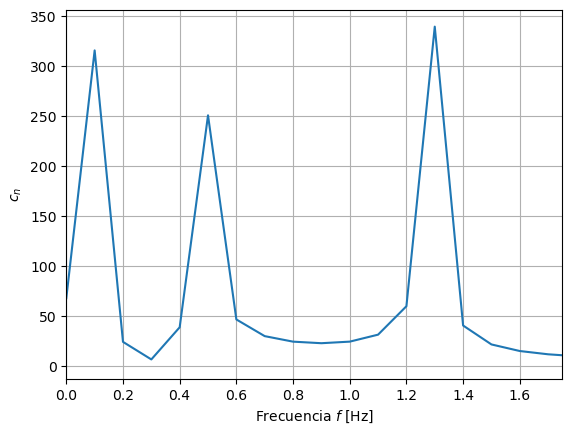

In [254]:
N = len(y_phase)
step = (x_phase[-1] - x_phase[0])/N
y_phase_fft = fft(y_phase)
x_phase_fft = fftfreq(N,step)[0:N//2]

plt.plot(x_phase_fft, np.abs(y_phase_fft[0:N//2]))
plt.xlim(0,1.75)
plt.ylabel(r"$c_n$")
plt.xlabel("Frecuencia $f$ [Hz]")
plt.grid()
plt.savefig("fft-phase.pdf")

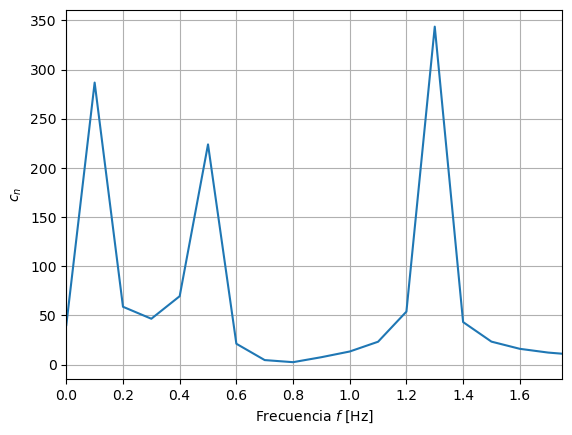

In [255]:
N = len(y_phasent)
step = (x_phasent[-1] - x_phasent[0])/N
y_phasent_fft = fft(y_phasent)
x_phasent_fft = fftfreq(N,step)[:N//2]

plt.plot(x_phasent_fft, np.abs(y_phasent_fft[0:N//2]))
plt.xlim(0,1.75)
plt.ylabel(r"$c_n$")
plt.xlabel("Frecuencia $f$ [Hz]")
plt.grid()
plt.savefig("fft-phasent.pdf")

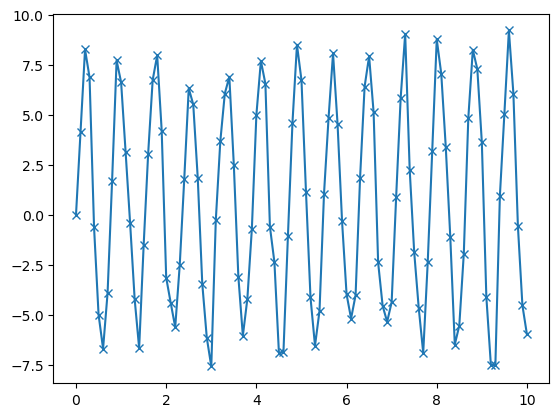

In [256]:
plt.plot(x_noise,y_noise,marker="x")
plt.savefig("noise.pdf")

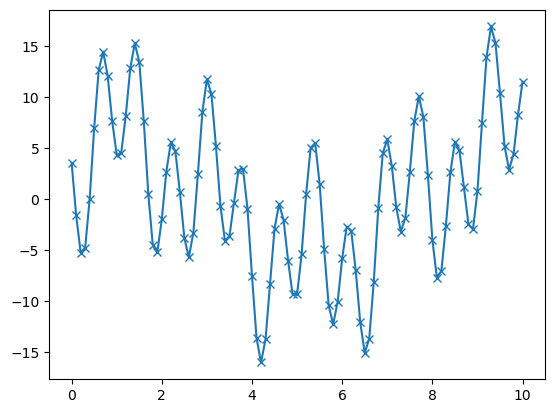

In [257]:
plt.plot(x_phase,y_phase,marker="x")
plt.savefig("phase.pdf")

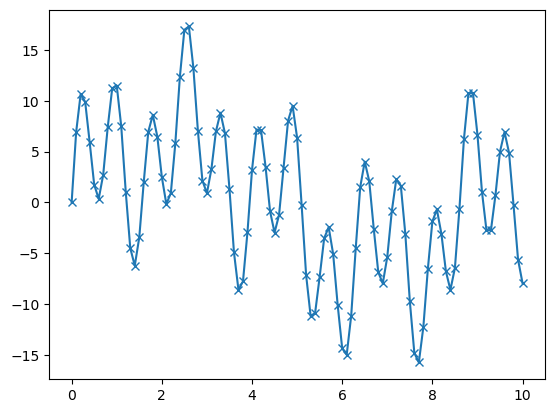

In [258]:
plt.plot(x_phasent,y_phasent,marker="x")
plt.savefig("phasent.pdf")

In [259]:
def VerifyMax(x:list,y:list) :
    """
    La función tiene como entrada dos listas con los valores de espectro de una estrella y retorna una lista de tuplas,
    siendo estas las posiciones de los puntos máximos.

    Args:
        x (list): Valores de espectro
        y (list): Valores de intensidad

    Returns:
        list: Lista de tuplas con los máximos locales de los datos.
    """
    
    xmax_points = []
    ymax_points = []
    
    for i in range(0, len(x)-1):
        left_handed_slope = (abs(y[i])-abs(y[i-1]))/(x[i] - x[i-1])
        right_handed_slope = (abs(y[i+1])-abs(y[i]))/(x[i+1] - x[i])
        if right_handed_slope < 0 and left_handed_slope > 0:
            xmax_points.append(x[i])
            ymax_points.append(y[i])
        
    return xmax_points, ymax_points

In [260]:
x_points_phasent,y_points = VerifyMax(x_phasent_fft,y_phasent_fft)
x_points_phasent

x_points_phase,y_points = VerifyMax(x_phase_fft,y_phase_fft)
x_points_phase

x_points_noise,y_points = VerifyMax(x_noise_fft,y_noise_fft)
x_points_noise,x_points_phase,x_points_phasent

([0.5,
  0.8,
  1.3,
  2.2,
  2.6,
  2.9000000000000004,
  3.2,
  3.5,
  3.9000000000000004,
  4.3,
  4.800000000000001],
 [0.1, 0.5, 1.3],
 [0.1, 0.5, 1.3])

In [261]:
def curve_phasent(t,a,b,c,d):
    return a*np.sin(2*np.pi*0.1*(t-d)) + b*np.sin(2*np.pi*0.5*(t-d)) + c*np.sin(2*np.pi*1.3*(t-d))

def curve_phase(t,a,b,c,d):
    return a*np.sin(2*np.pi*0.1*(t-d)) + b*np.sin(2*np.pi*0.5*(t-d)) + c*np.sin(2*np.pi*1.3*(t-d))

def curve_noise(t,a,d):
    return a*np.sin(2*np.pi*1.3*(t-d))

In [262]:
c_phasent,void = opt.curve_fit(curve_phasent,x_phasent,y_phasent,method="trf")
c_phase,void = opt.curve_fit(curve_phase,x_phase,y_phase,method="trf")
c_noise,void = opt.curve_fit(curve_noise,x_noise,y_noise,method="trf")

[6.27421099 0.87114778]


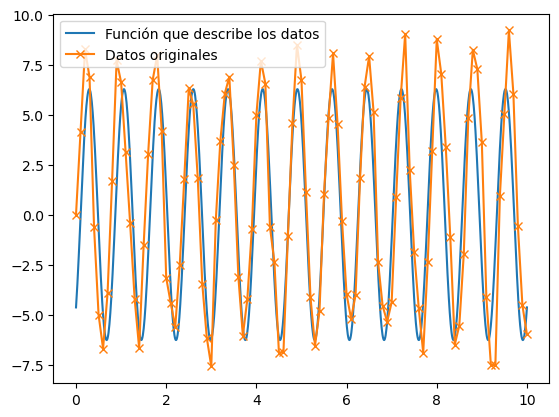

In [263]:
t = np.linspace(0,10,1000)
y = curve_noise(t,c_noise[0],c_noise[1])
print(c_noise)
plt.plot(t,y,label="Función que describe los datos")
plt.plot(x_noise,y_noise,label="Datos originales",marker="x")
plt.legend()
plt.savefig("fft-data-noise.pdf")

[-2.07824764  4.23674908 -6.14598644  0.92488144]


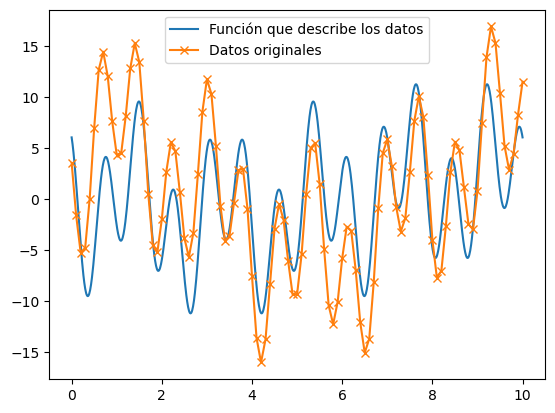

In [264]:
t = np.linspace(0,10,1000)
y = curve_phase(t,c_phase[0],c_phase[1],c_phase[2],c_phase[3])
print(c_phase)
plt.plot(t,y,label="Función que describe los datos")
plt.plot(x_phase,y_phase,label="Datos originales",marker="x")
plt.legend()
plt.savefig("fft-data-phase.pdf")

[4.92718911 3.91296549 6.2262179  0.1048522 ]


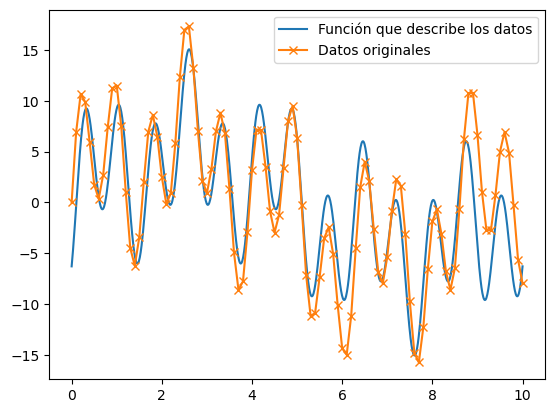

In [267]:
t = np.linspace(0,10,1000)
y = curve_phasent(t,c_phasent[0],c_phasent[1],c_phasent[2],c_phasent[3])
print(c_phasent)
plt.plot(t,y,label="Función que describe los datos")
plt.plot(x_phasent,y_phasent,label="Datos originales",marker="x")
plt.legend()
plt.savefig("fft-data-phasent.pdf")

# Cálculos por curiosidad

In [266]:
def SINEWAVE(t,A,B,f1,f2):
    return A*np.cos(2*np.pi*f1*t) + B*np.sin(2*np.pi*f2*t)

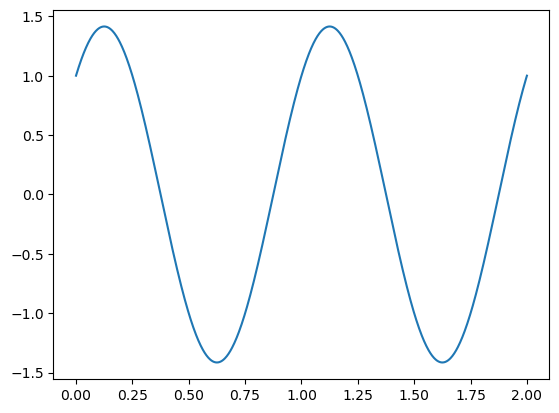

In [181]:
t = np.linspace(0,2,1000)
y = SINEWAVE(t,1,1,1,1)
plt.plot(t,y)


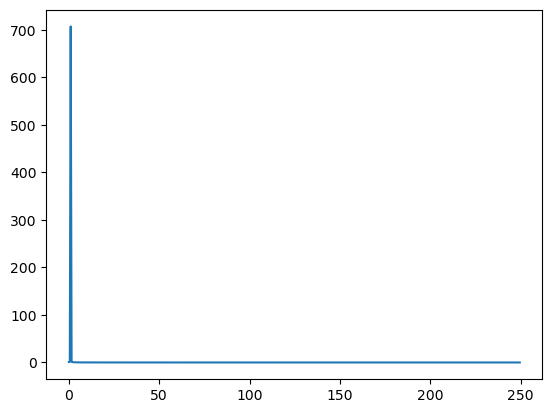

In [182]:
N = len(y)
step = (t[-1] - t[0])/N
y_fft = fft(y)
x_fft = fftfreq(N,step)[:N//2]
plt.plot(x_fft,np.abs(y_fft[0:N//2]))

In [219]:
x_rectangular_simplified = x_rectangular_fft[6:12]
x_rectangular_simplified
print(x_rectangular_simplified)
def corve(t,a,b,c,d,e):
    return a*np.sin(2*np.pi*150*t) + b*np.sin(2*np.pi*200*t) + c*np.sin(2*np.pi*220*t) + d*np.sin(2*np.pi*140*t)+e*np.sin(2*np.pi*120*t)

c,void = opt.curve_fit(corve,Rectangular["X"],Rectangular["Y"])
c

[120.04801921 140.05602241 160.06402561 180.07202881 200.08003201
 220.08803521]


array([ 4.81123787,  0.02169229, -0.0269295 , -0.01831791,  0.01272726])

In [224]:
t = np.linspace(-0.03,0.03,1000)
y = corve(t,5,1,1/5,1/25,1/125)

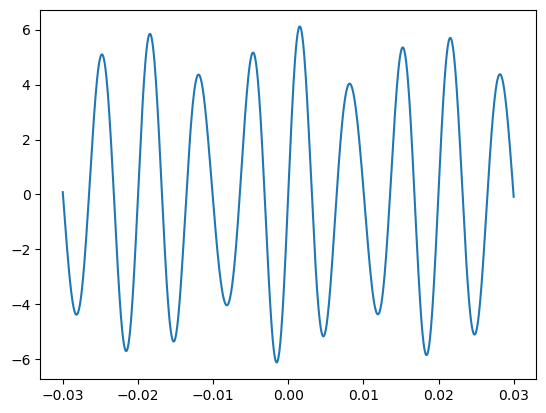

In [225]:
plt.plot(t,y)

In [282]:
sum = 0
for i in range(2):
    sum += 2*i+1
2*sum

8

In [298]:
i = 1
for n in range(1,6):
    print("\n \n")
    for ell in range(0,n):
        for m_l in range(-ell,ell+1):
            for s in ["","-"]:
                if i%5 == 0:
                    i+=1
                    print(r"$(%s,%s,%s,%s\nicefrac{1}{2})$"%(n,ell,m_l,s),end=r" \\")
                else:
                    print(r"$(%s,%s,%s,%s\nicefrac{1}{2})$"%(n,ell,m_l,s),end=",")


 

$(1,0,0,\nicefrac{1}{2})$,$(1,0,0,-\nicefrac{1}{2})$,
 

$(2,0,0,\nicefrac{1}{2})$,$(2,0,0,-\nicefrac{1}{2})$,$(2,1,-1,\nicefrac{1}{2})$,$(2,1,-1,-\nicefrac{1}{2})$,$(2,1,0,\nicefrac{1}{2})$,$(2,1,0,-\nicefrac{1}{2})$,$(2,1,1,\nicefrac{1}{2})$,$(2,1,1,-\nicefrac{1}{2})$,
 

$(3,0,0,\nicefrac{1}{2})$,$(3,0,0,-\nicefrac{1}{2})$,$(3,1,-1,\nicefrac{1}{2})$,$(3,1,-1,-\nicefrac{1}{2})$,$(3,1,0,\nicefrac{1}{2})$,$(3,1,0,-\nicefrac{1}{2})$,$(3,1,1,\nicefrac{1}{2})$,$(3,1,1,-\nicefrac{1}{2})$,$(3,2,-2,\nicefrac{1}{2})$,$(3,2,-2,-\nicefrac{1}{2})$,$(3,2,-1,\nicefrac{1}{2})$,$(3,2,-1,-\nicefrac{1}{2})$,$(3,2,0,\nicefrac{1}{2})$,$(3,2,0,-\nicefrac{1}{2})$,$(3,2,1,\nicefrac{1}{2})$,$(3,2,1,-\nicefrac{1}{2})$,$(3,2,2,\nicefrac{1}{2})$,$(3,2,2,-\nicefrac{1}{2})$,
 

$(4,0,0,\nicefrac{1}{2})$,$(4,0,0,-\nicefrac{1}{2})$,$(4,1,-1,\nicefrac{1}{2})$,$(4,1,-1,-\nicefrac{1}{2})$,$(4,1,0,\nicefrac{1}{2})$,$(4,1,0,-\nicefrac{1}{2})$,$(4,1,1,\nicefrac{1}{2})$,$(4,1,1,-\nicefrac{1}{2})$,$(4,2,-2,\nicefrac{1